<a href="https://colab.research.google.com/github/Surayia-Rahman/minipython/blob/main/FLP_Assgnment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

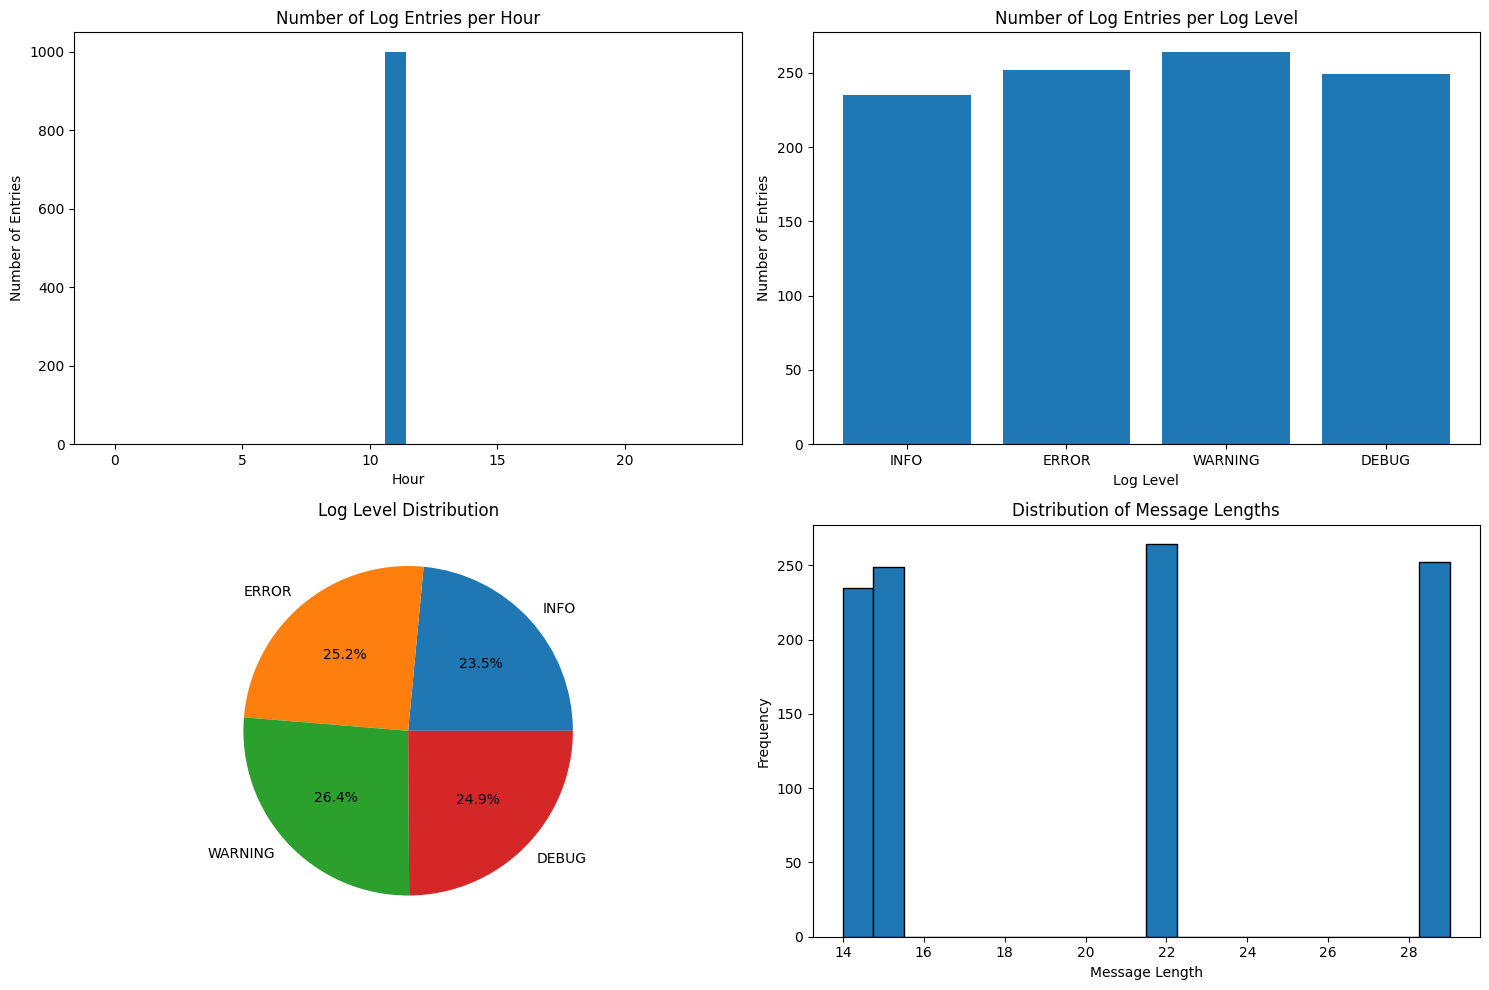

Average Message Length: 20.14 characters


In [ ]:
from datetime import datetime
from random import choice, randint
from string import ascii_lowercase, digits
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import numpy as np

def generate_event_message(log_level):
    if log_level == 'INFO':
        return f"User logged in"
    elif log_level == 'ERROR':
        return f"Failed to connect to database"
    elif log_level == 'WARNING':
        return f"Disk space running low"
    elif log_level == 'DEBUG':
        return f"Processing data"
    else:
        return f"Unknown event"

def create_bogus_log_file(file_path, num_lines=1000):
    with open(file_path, 'w') as f:
        for _ in range(num_lines):
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            log_level = choice(['INFO', 'ERROR', 'WARNING', 'DEBUG'])
            event_message = generate_event_message(log_level)
            f.write(f"{timestamp} - {log_level} - {event_message}\n")

def read_log_file(file_path):
    with open(file_path, 'r') as f:
        return f.readlines()

def extract_info(line):
    timestamp, log_level, message = re.match(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) - (\w+) - (.+)', line).groups()
    return timestamp, log_level, message

def process_log_file(file_path):
    log_lines = read_log_file(file_path)
    log_entries = map(extract_info, log_lines)

    counts_per_hour = np.zeros(24, dtype=int)
    counts_per_level = {'INFO': 0, 'ERROR': 0, 'WARNING': 0, 'DEBUG': 0}
    total_message_length = 0
    total_messages = 0

    for timestamp, log_level, message in log_entries:
        hour = int(timestamp[11:13])
        counts_per_hour[hour] += 1
        counts_per_level[log_level] += 1
        total_message_length += len(message)
        total_messages += 1

    average_message_length = total_message_length / total_messages

    return counts_per_hour, counts_per_level, average_message_length

def plot_statistics(counts_per_hour, counts_per_level, average_message_length):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].bar(range(24), counts_per_hour)
    axs[0, 0].set_xlabel('Hour')
    axs[0, 0].set_ylabel('Number of Entries')
    axs[0, 0].set_title('Number of Log Entries per Hour')

    axs[0, 1].bar(counts_per_level.keys(), counts_per_level.values())
    axs[0, 1].set_xlabel('Log Level')
    axs[0, 1].set_ylabel('Number of Entries')
    axs[0, 1].set_title('Number of Log Entries per Log Level')

    axs[1, 0].pie(counts_per_level.values(), labels=counts_per_level.keys(), autopct='%1.1f%%')
    axs[1, 0].set_title('Log Level Distribution')

    log_entries = map(extract_info, read_log_file(log_file_path))
    message_lengths = [len(message) for _, _, message in log_entries]
    axs[1, 1].hist(message_lengths, bins=20, edgecolor='black')
    axs[1, 1].set_xlabel('Message Length')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title('Distribution of Message Lengths')

    plt.tight_layout()
    plt.show()

    print(f"Average Message Length: {average_message_length:.2f} characters")

# Main program
log_file_path = 'bogus_log_file.txt'
create_bogus_log_file(log_file_path, num_lines=1000)
counts_per_hour, counts_per_level, average_message_length = process_log_file(log_file_path)
plot_statistics(counts_per_hour, counts_per_level, average_message_length)
